In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cars = pd.read_csv('Datasets/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

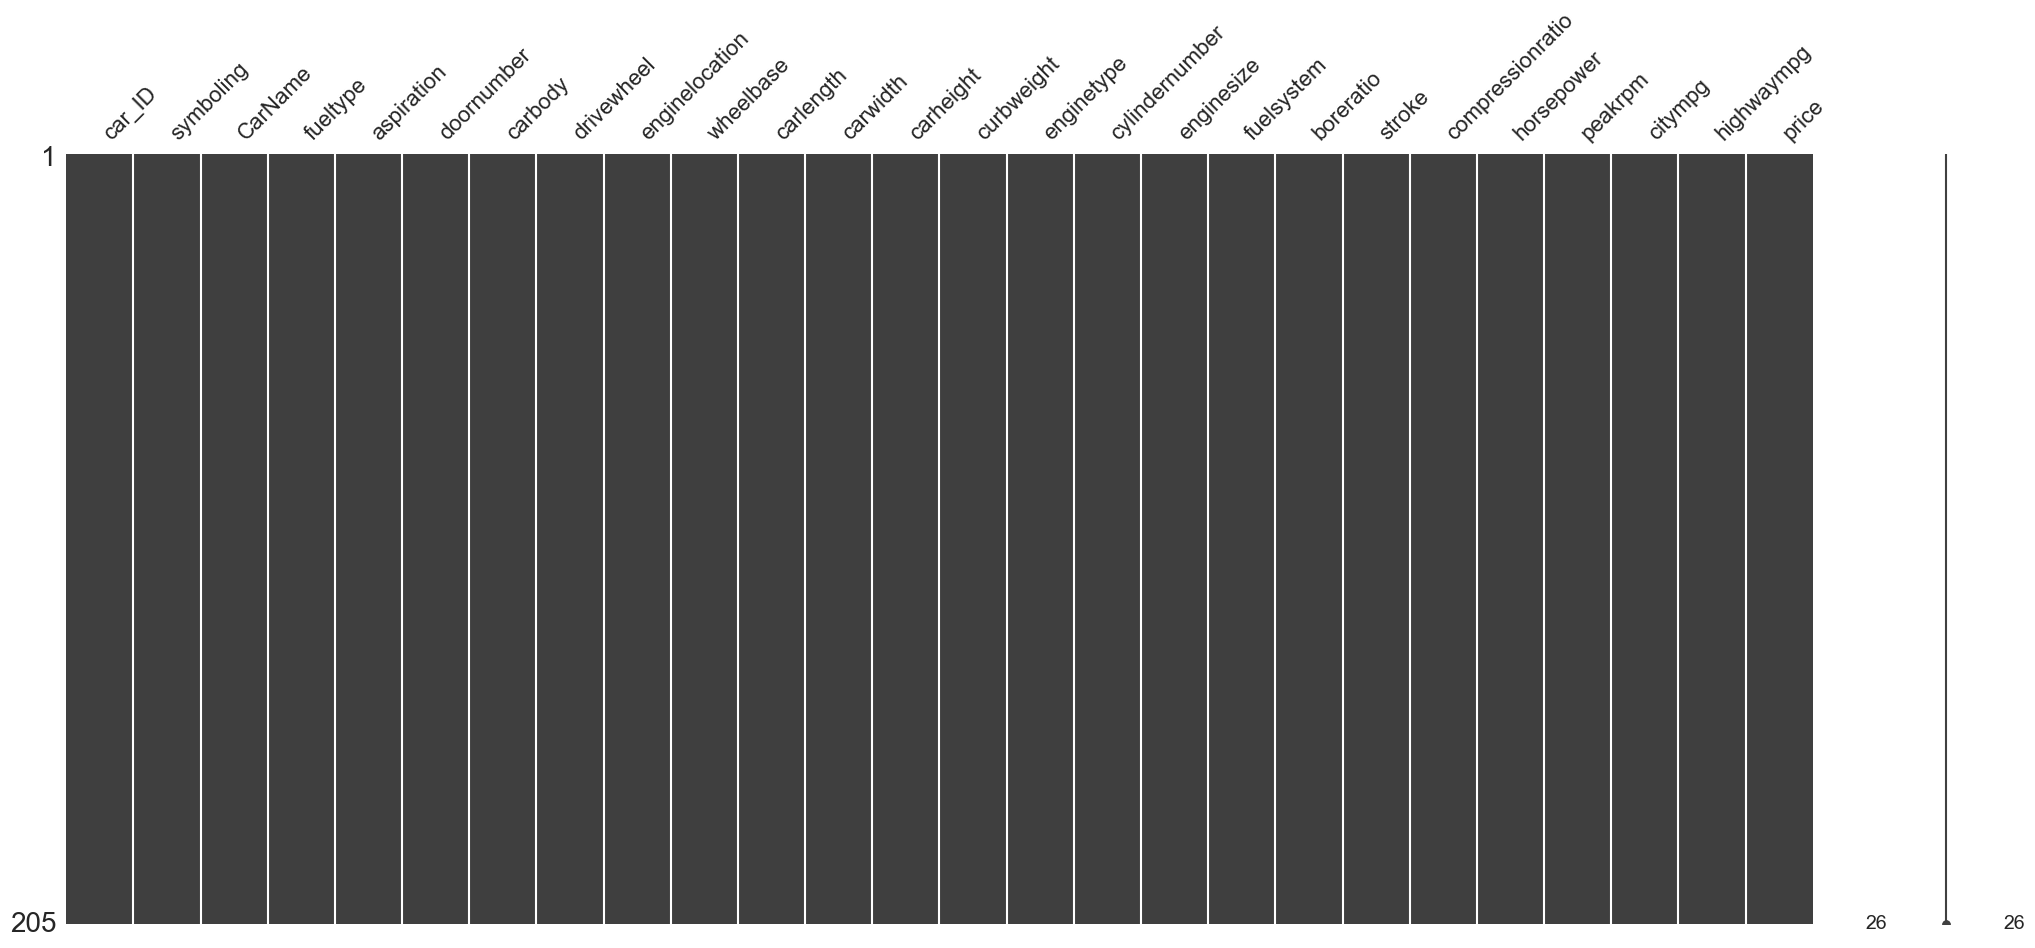

In [6]:
import missingno

missingno.matrix(cars)

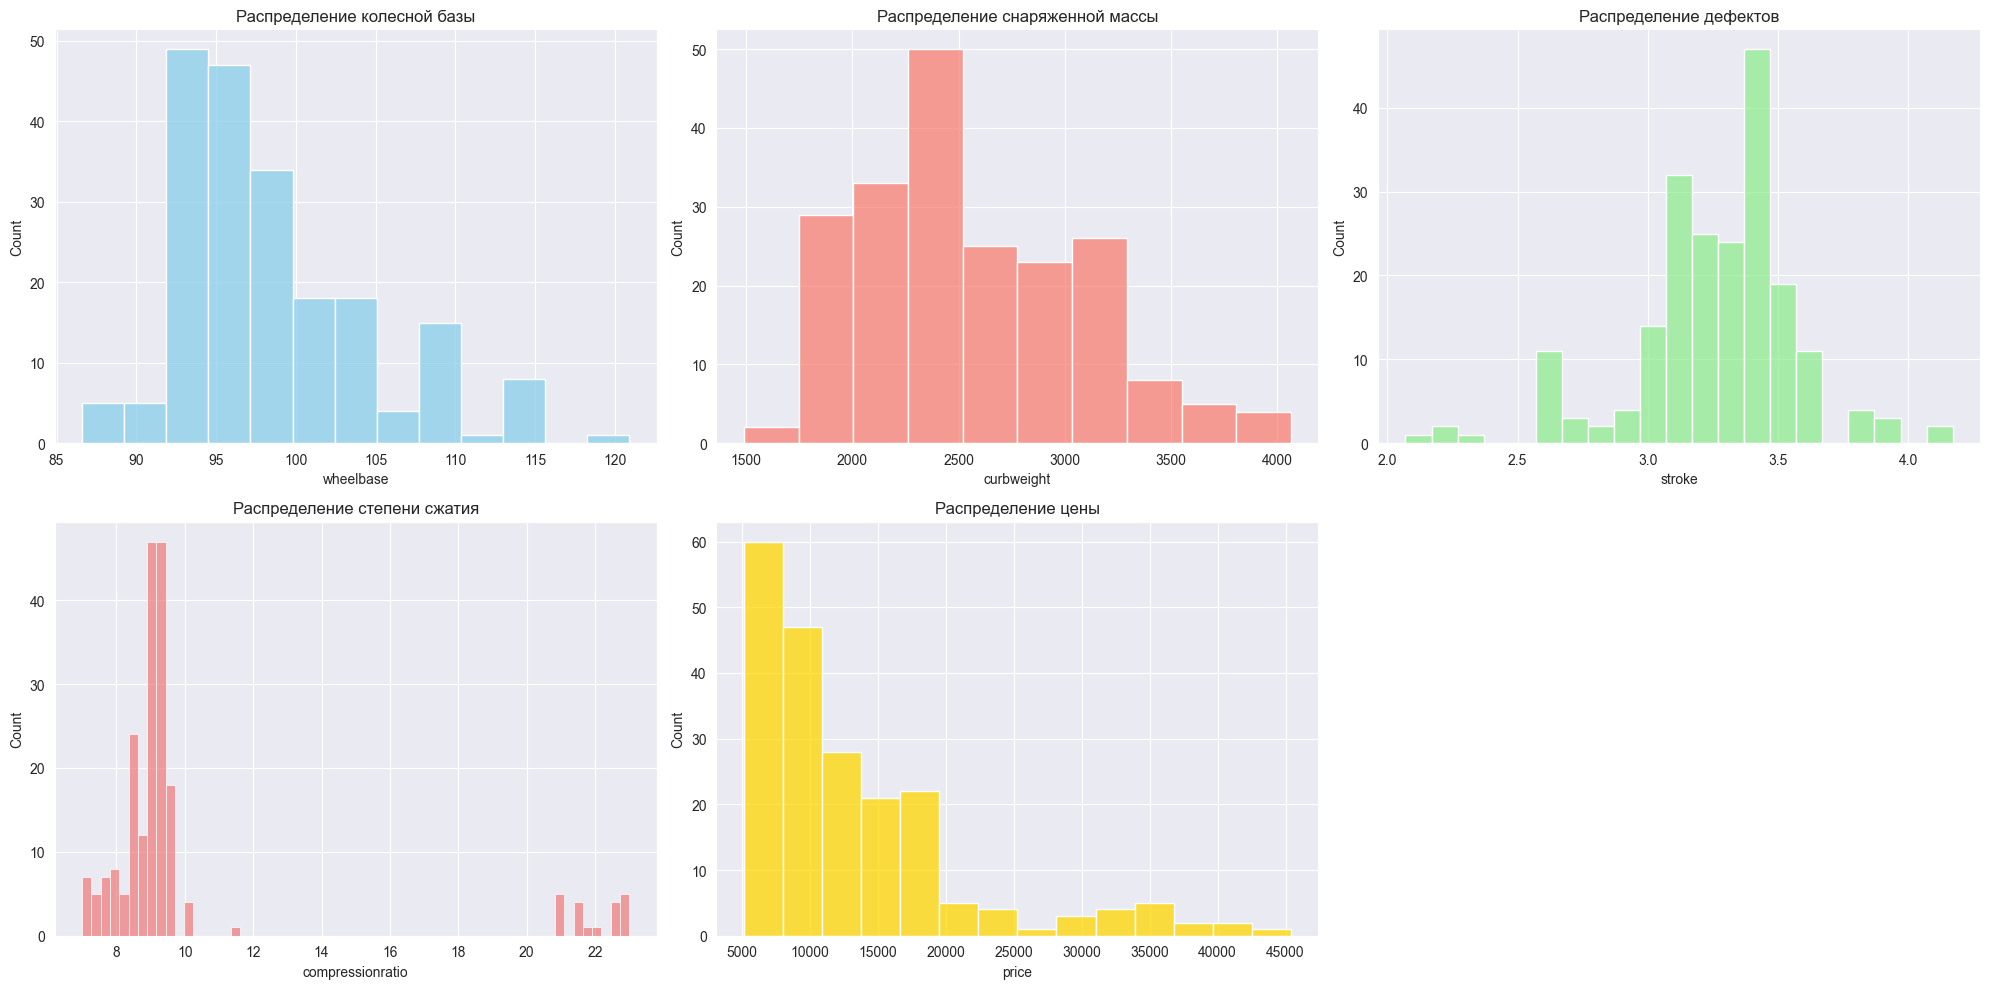

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Колесная база
sns.histplot(cars['wheelbase'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Распределение колесной базы')

# Снаряженная масса
sns.histplot(cars['curbweight'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Распределение снаряженной массы')

# Дефекты
sns.histplot(cars['stroke'], ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Распределение дефектов')

# Степень сжатия
sns.histplot(cars['compressionratio'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Распределение степени сжатия')

# Цена
sns.histplot(cars['price'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Распределение цены')

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

# все числовые переменные (float и int) в наборе данных

In [8]:
cars_numeric = cars.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Отбросим символы и идентификаторы автомобилей

In [9]:
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


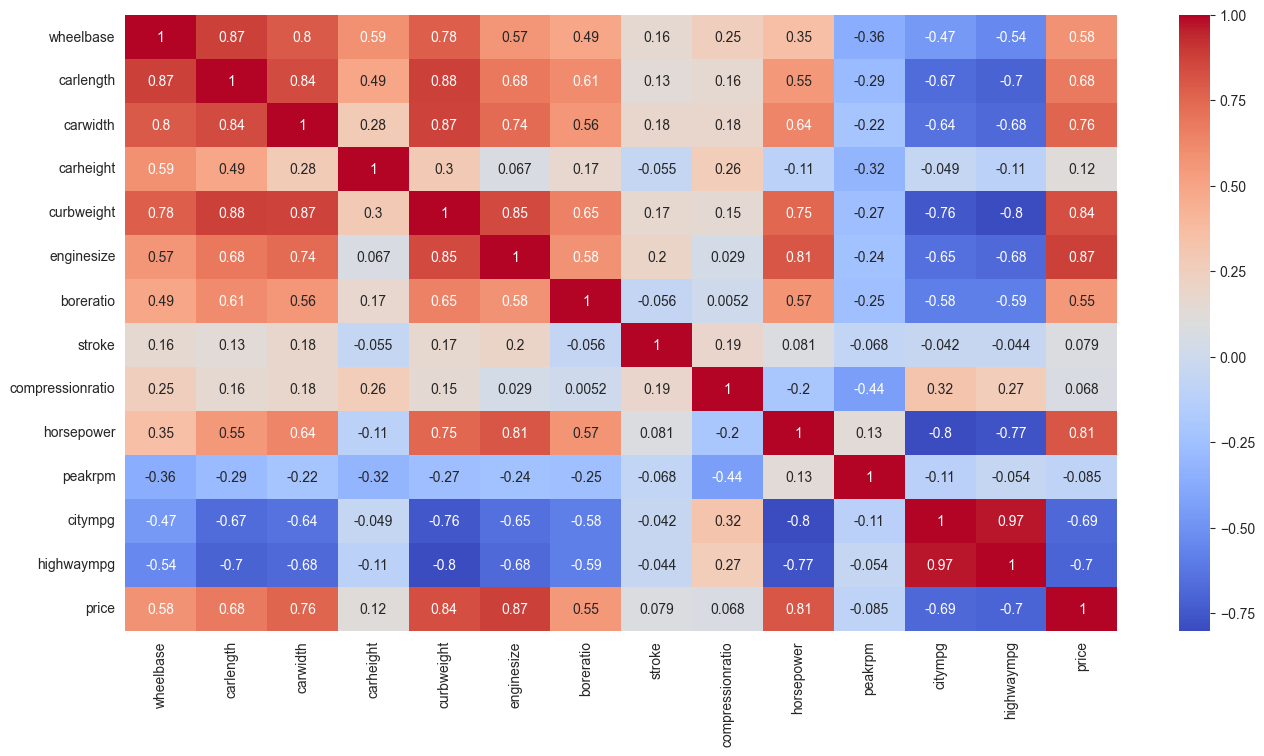

In [10]:
cor = cars_numeric.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

# Преобразуем категориальные переменные в числовые, используя one-hot encoding

In [11]:
cars = pd.get_dummies(cars, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'])

In [12]:
X = cars[['horsepower', 'enginesize', 'highwaympg']]
y = cars['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Регрессия

In [15]:
alpha = 1.0
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [16]:
y_pred = lasso_model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import explained_variance_score, max_error, median_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
median_absolute_err = median_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"EV: {explained_variance}")
print(f"Max Error: {max_err}")
print(f"MAE: {median_absolute_err}")

MSE: 16350343.815551681
R2: 0.7928868629522158
EV: 0.7939062109101733
Max Error: 13937.861656934965
MAE: 2304.193993555029


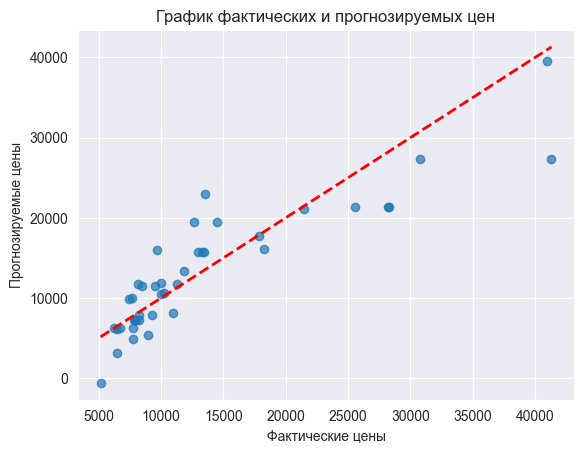

In [18]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Фактические цены")
plt.ylabel("Прогнозируемые цены")
plt.title("График фактических и прогнозируемых цен")
plt.show()

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_pred})
df['Predictions'] = round(df['Predictions'], 2)
df.head()

,Actual,Predictions
15,30760.000,27377.14
9,17859.167,17742.34
100,9549.000,11551.85
132,11850.000,13321.99
68,28248.000,21319.52
